## Redes Neurais e Algoritmos Genéticos
### Atividade: Monstrinho 1
### Etapa: Algoritmos Genéticos
### Trio: Diogo Carvalho, José David e Mayllon Emmanoel

<b>Objetivo:</b> Compare a performance de três algoritmos diferentes de otimização (busca
aleatória, busca em grade e algoritmos genéticos) para resolver o problema das caixas
binárias.

### 1. Introdução

O notenook abaixo propõe-se a fazer uma comparação de performance entre diferentes algoritmos estudados no ínicio da etapa de algoritmos genéticos com foco em otimização de tarefas. Os algoritmos propostos para o teste são:

<ul>
    <li>Busca Aleatória</li>
    <li>Busca em Grade</li>
    <li>Algoritmos Genéticos</li>
</ul>

Dentre os algoritmos acima, a busca em grade é o único considerado determinístico, o que nos leva a necessidade de utilizar de ferramentas estatísticas para estabelecer uma comparação do mesmo com os algoritmos considerados não determinísticos: Busca aleatória e Busca em Grade

### 2. O problema

O problema proposto é o das "Caixas Binárias". Esse problema tem por objetivo preencher listas com caixas fazendo com que a soma dos valores seja a maior possíves. Sendo esse problema nomeado por caixas binárias, percebemos que as mesmas possuem apenas duas possibilidade de valores para representa-las (0 ou 1).

### 3. Comparações acertos

In [137]:
import random
from funcoes_5 import funcao_objetivo_cb
from funcoes_5 import cria_candidato_cb, gene_cb
from itertools import product
from funcoes_5 import funcao_objetivo_pop_cb 
from funcoes_5 import populacao_cb as cria_populacao
from funcoes_5 import selecao_roleta_max
from funcoes_5 import cruzamento_ponto_simples
from funcoes_5 import mutacao_simples_cb 
from pprint import pprint
import matplotlib.pyplot as plt
from itertools import product
import statistics as st
import timeit as tm
import pandas as pd


#### 3.1 Busca aleatória 

Na busca aleatória, sorteamos possíveis candidatos para a solução do nosso problema em um determinado espaço de busca, testamos os candidatos e verificamos se eles resolvem nosso problema.

Após definidas as funçoes necessárias para o desenvolvimento do algoritmo de busca aleatória, estabelecemos as constantes a serem usadas no experimento. A primeira delas sendo o número de caixas. Por recomendação do próprio enunciado do problema, escolhemos variar o número de caixas e observar a distribuição dos resultados que a mesma produz, deixando apenas o número de sorteios fixo por enquanto. Estabelecemos um "range" fixo de 20 números diferentes de caixas, essa lista será mantida constante durante todo o experimento.

In [138]:
NUM_CAIXAS = [x for x in range(4,21)] 

Para facilitar os testes variando outros parâmetros de interesse no futuro, optamos por encapsular o procedimento de procura dos melhores valores pela busca em grade em uma função

In [139]:
def calcular_resultados_ba(NUM_CAIXAS, NUM_SORTEIOS):
    resultados = []
    for valor in NUM_CAIXAS: 
        a = []
        for i in range(NUM_SORTEIOS):
            candidato = cria_candidato_cb(valor)
            fobj = funcao_objetivo_cb(candidato)
            if fobj == valor: #acha o valor máximo
                a.append(1)
        resultados.append(len(a))
    return resultados

In [140]:
NUM_SORTEIOS = 100

In [141]:
Resultado_100 = calcular_resultados_ba(NUM_CAIXAS, NUM_SORTEIOS)

In [142]:
Resultado_100

[8, 3, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [143]:
df = pd.DataFrame({
    'Número de caixas': NUM_CAIXAS,
    'Acertos': Resultado_100
})

df

,Número de caixas,Acertos
0,4,8
1,5,3
2,6,3
3,7,1
4,8,0
5,9,0
6,10,1
7,11,0
8,12,0
9,13,0


In [144]:
tempo_execucao = tm.timeit(lambda: calcular_resultados_ba(NUM_CAIXAS, NUM_SORTEIOS), number=1)

Estabelecemos como métrica, a taxa de acerto do nosso algoritmo em achar a melhor resposta com relação ao número de sorteios e com isso, fazemos a média desses resultados. O valor dessa média (taxa de acerto) será estabelecido como parâmetro para comparação com outros resultados. 

In [145]:
x_div = [x/NUM_SORTEIOS for x in Resultado_100]

taxa_acerto_ba = sum(x_div)/len(x_div)

print(f"A Taxa de acerto para a busca aleatória {NUM_SORTEIOS} é {taxa_acerto_ba}")

A Taxa de acerto para a busca aleatória 100 é 0.009411764705882356


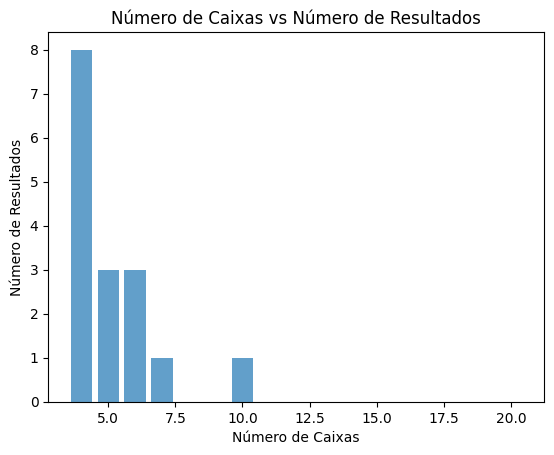

In [165]:
plt.bar(NUM_CAIXAS, Resultado_100, align='center', alpha=0.7)
plt.xlabel('Número de Caixas')
plt.ylabel('Número de Resultados')
plt.title('Número de Caixas vs Número de Resultados')
plt.show()

Ao plotarmos o gráfico de barras, percebemos que com um número relativamente baixo escolhido para o número de sorteios, os resultado máximos que objetivamos no problema das caixas binárias fica concentrado na região esquerda do gráfico onde os valores escolhidos para o número de caixa são menores. Isso ocorre, pois, a medida que aumentamos nosso "espaço de busca" (de 4 possibilidade para 50 possibilidades por exemplo) a tendência de nosso algoritmo de achar os valores exatos que solucionem nosso problema diminui gradativamente. Um experimento interessante que podemos fazer é variar também o número de sorteio que fazemos e observar o resultado

#### 3.2 Busca em grade

Esse algoritmo que é muito conhecido também como "Busca exaustiva" é uma estratégia de otimização que testa todas as combinações possíveis dos parâmetros de interesse. O exaustiva em seu nome não é por acaso, já que esse algoritmo é conhecido por ter um alto custo computacional 

In [147]:
NUM_CAIXAS

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [148]:
def calcular_resultados_bg(NUM_CAIXAS):
    Resultados = []
    for valor in NUM_CAIXAS:
        a = []
        for candidato in product([0, 1], repeat=valor):
            fobj = sum(candidato)
            if valor == fobj:
                a.append(1)
        Resultados.append(len(a))
    return Resultados

In [149]:
Resultados = calcular_resultados_bg(NUM_CAIXAS)

In [150]:
tempo_execucao = tm.timeit(lambda: calcular_resultados_bg(NUM_CAIXAS), number=1)

In [151]:
tempo_execucao

1.0402891999692656

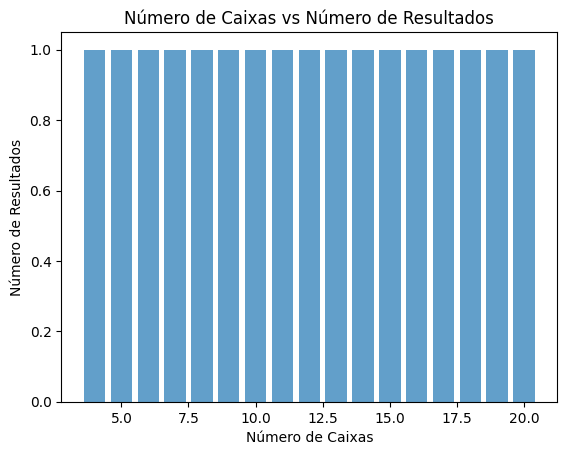

In [166]:
plt.bar(NUM_CAIXAS, Resultados, align='center', alpha=0.7)
plt.xlabel('Número de Caixas')
plt.ylabel('Número de Resultados')
plt.title('Número de Caixas vs Número de Resultados')
plt.show()

In [153]:
x_div = [x/1 for x in Resultados]

taxa_acerto_bg = sum(x_div)/len(x_div)

print(f"A Taxa de acerto da busca em grade é de {taxa_acerto_bg}")

A Taxa de acerto da busca em grade é de 1.0


In [154]:
df = pd.DataFrame({
    'Número de caixas': NUM_CAIXAS,
    'Acertos': Resultados
})

df

,Número de caixas,Acertos
0,4,1
1,5,1
2,6,1
3,7,1
4,8,1
5,9,1
6,10,1
7,11,1
8,12,1
9,13,1


Por ser o único algoritimo determinístico dos três, a busca em grade terá sempre probabilidade máxima de encontrar o melhor candidato para a resolução do problema. Essa característica decorre justamente de sua capacidade de testar todos os possíveis resultados dentre os conjuntos de itens de interesse. Nesse experimento, optamos por não executar o algoritmo mais de uma vez, pois, além de o mesmo ter um alto custo computacional (se comparado aos demais) demandando um alto tempo de execução, é claramente intuitivo que a porcentagem de acertos será mantida em 100%

#### 3.3 Algoritmo Genético

Algoritmos genéticos é uma das principais e mais básicas ferramentas computacionais bioinspiradas, nesse caso, na teoria da evolução de Darwim e são muito usados em problemas de otimização. O método do algoritmo consiste em gerar populações aleatórias e evolui-las através de três principais etapas

<ul>
    <li>Seleção</li>
     <li>Cruzamento</li>
     <li>Mutação</li>
</ul>

Para nosso experimento, permanecemos com o mesmo "range" de número de caixas usado com os algoritmos anteriores e mantemos fixas as outras constantes necessárias para a execução do algoritmo. Uma constante interessante para esse experimento é o número de gerações, todas as vezes que uma nova população é criada, uma nova geração surge

In [155]:
#NUM_CAIXAS = 5
TAMANHO_POPULACAO = 10
NUM_GERACOES = 100 #Ciclos de evolução
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05

In [156]:
def calcular_resultados_ga(NUM_CAIXAS, TAMANHO_POPULACAO, NUM_GERACOES, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO):
    hall_da_fama = []
    Resultados = []

    for valor in NUM_CAIXAS:
        populacao = cria_populacao(TAMANHO_POPULACAO, valor)
        for n in range(NUM_GERACOES):
            # Seleção
            fitness = funcao_objetivo_pop_cb(populacao)        
            selecionados = selecao_roleta_max(populacao, fitness)

            # Cruzamento
            proxima_geracao = []
            for pai, mae in zip(selecionados[::2], selecionados[1::2]):
                individuo1, individuo2 = cruzamento_ponto_simples(pai, mae, CHANCE_DE_CRUZAMENTO)
                proxima_geracao.append(individuo1)
                proxima_geracao.append(individuo2)

            # Mutação
            mutacao_simples_cb(proxima_geracao, CHANCE_DE_MUTACAO)

            # Atualização do hall da fama
            fitness = funcao_objetivo_pop_cb(proxima_geracao)
            maior_fitness = max(fitness)
            indice = fitness.index(maior_fitness)
            hall_da_fama.append(proxima_geracao[indice])    

            # Encerramento
            populacao = proxima_geracao

        fitness = funcao_objetivo_pop_cb(hall_da_fama)
        maior_fitness = max(fitness)
        indice = fitness.index(maior_fitness)
        melhor_individuo_observado = hall_da_fama[indice]

        result = fitness.count(valor)
        Resultados.append(result)

    return Resultados, hall_da_fama

In [157]:
resultados, hall_da_fama = calcular_resultados_ga(NUM_CAIXAS, TAMANHO_POPULACAO, 100, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO)

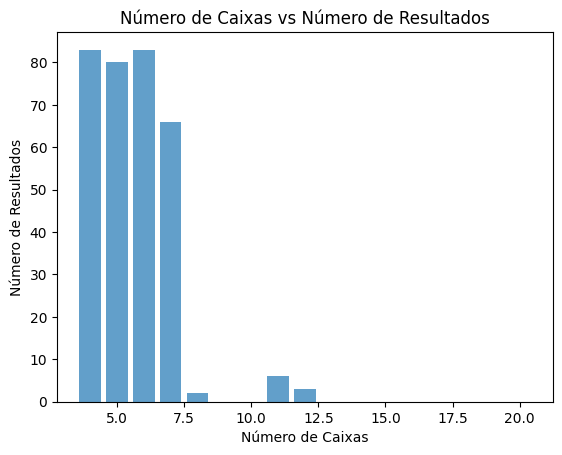

In [167]:
plt.bar(NUM_CAIXAS, resultados, align='center', alpha=0.7)
plt.xlabel('Número de Caixas')
plt.ylabel('Número de Resultados')
plt.title('Número de Caixas vs Número de Resultados')
plt.show()

In [159]:
x_div = [x/NUM_GERACOES for x in resultados]

taxa_acerto_ga = sum(x_div)/len(x_div)

print(f"A Taxa de acerto do algoritmo genético é de {taxa_acerto_ga}")


A Taxa de acerto do algoritmo genético é de 0.19


In [160]:
df = pd.DataFrame({
    'Número de caixas': NUM_CAIXAS,
    'Acertos': resultados
})

df

,Número de caixas,Acertos
0,4,83
1,5,80
2,6,83
3,7,66
4,8,2
5,9,0
6,10,0
7,11,6
8,12,3
9,13,0


### 4. Tempo de execução

Porém, para uma análise bem sucedida da performance do algoritmo devemos não apenas levar em conta a capacidade do mesmo de nos retonar os resultados adequados, mas também seu custo computacional. Para isso, fizemos testes com os diferentes algoritmos em prova e registrar em quanto tempo os mesmos executam suas tarefas, para isso, utilizamos a biblioteca "timeit".

In [161]:
tempo_execucao_ba = tm.timeit(lambda: calcular_resultados_ba(NUM_CAIXAS, 1), number=1)

print(f"O tempo de execução da busca aleatória é de {tempo_execucao_ba}s")

O tempo de execução da busca aleatória é de 0.0002269999822601676s


In [162]:
tempo_execucao_bg = tm.timeit(lambda: calcular_resultados_bg(NUM_CAIXAS), number=1)

tempo_execucao

print(f"O tempo de execução da busca em grade é de {tempo_execucao}s")

O tempo de execução da busca em grade é de 1.0402891999692656s


In [163]:
tempo_execucao_ga = tm.timeit(lambda: calcular_resultados_ga(NUM_CAIXAS, TAMANHO_POPULACAO, 1, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO), number=1)

print(f"O tempo de execução do algoritmo genético é de {tempo_execucao_ga}s")

O tempo de execução do algoritmo genético é de 0.005912599968723953s


In [164]:
data = {
    'Algoritmo': ['Busca Aleatória', 'Busca em Grade', 'Algoritmo Genético'],
    'Tempo de Execução (s)': [tempo_execucao_ba, tempo_execucao_bg, tempo_execucao_ga],
    'Taxa de Acerto (%)': [taxa_acerto_ba, taxa_acerto_bg, taxa_acerto_ga]
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Exibir o DataFrame
df

,Algoritmo,Tempo de Execução (s),Taxa de Acerto (%)
0,Busca Aleatória,0.000227,0.009412
1,Busca em Grade,1.126597,1.000000
2,Algoritmo Genético,0.005913,0.190000


### 5. Resultados

Sabemos que a análise de performance de um algoritmo não é dada apenas por sua capacidade de se encontrar a melhor resposta para o problema, mas também seu custo computacional. Em nosso caso, consideramos como parâmetro para o custo computacional o tempo de execução de cada algoritimo. Em nossa etapa inicial da análise, consideramos apenas os "acertos" dos algoritimos, e nessa fase, o algorimo de Busca em grade se sai claramente melhor que seus adversários, pois, em todas as possibilidades propostas, o mesmo sempre encontrou a melhor resposta. (Novamente) essa característica deve-se a sua natureza determinística, exaustivamente testando todas as possibilidades com o intuito de encontrar a melhor. Em segundo lugar, o algoritmo genético e em último a busca aleatória. Porém, se passarmos a considerar o custo computacional que cada um demanda em sua execução, a busca em grade perde em comparação com seus adversários, sendo a busca aleatória o algoritmo com o menor tempo de execução e o algoritmo genético em segundo. Se elencarmos os algoritmos com base nesses dois parâmetros:

</h4> Taxa de acerto
<ol>
    <li> Busca em Grade </li>
    <li> Algoritmo Genético </li>
    <li> Busca aleatória </li>
</ol>
    
</h4> Tempo de execução
<ol>
    <li>Busca aleatória</li>
    <li>Algoritmo Genético</li>
    <li>Busca em Grade</li>
</ol>

Percebemos com isso que não necessariamente o código com a melhor taxa de acertos será o mais eficiente quanto ao custo computacional envolvivo (e vice-versa). Por exemplo, a vantagem que a busca em grade nos dá ao termos certeza de que sempre obteremos a melhor resposta possível é mitigada pelo fato de que a mesma exige alto custo computacional. Em nossa análise, Concluimos que o algoritmo genético manteve-se sempre na média entre os outros dois algoritmos testados, não demandando tanto tempo de execução e entregando uma taxa de acertos consideravelmente boa.

### 5. Referências

[1] statistics — Mathematical statistics functions. Disponível em: <https://docs.python.org/3/library/statistics.html#statistics.mean>. <br>
[2] Cassar, D. R. ATP-303 GA 1.3 - Notebook busca aleatória.ipynb <br>
[3] Cassar, D. R. ATP-303 GA 1.5 - Notebook busca em grade.ipynb <br>
[4] Cassar, D. R. ATP-303 GA 2.3 - Notebook algoritmo genético.ipynb <br>
[5] timeit — Measure execution time of small code snippets — Python 3.9.0 documentation. Disponível em: <https://docs.python.org/3/library/timeit.html>.

‌

